In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
all_AVA_muts = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'PhoP': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,D9A (GAT→GCT),hfq,NaN,1 124 1 1,clone,42C 1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",{'ECK120000431': ['ECK120000431']},[{'name': 'yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC...,{'ECK125147410': ['ECK120000431']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['ECK125147410']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/

In [3]:
combo_assoc_mat = pd.DataFrame()

signif_logodds_assoc_mat_files = [
    "../data/assocs/geno_signif_logodds_assoc_mat.pkl",
    "../data/assocs/ops_signif_logodds_assoc_mat.pkl",
    "../data/assocs/pathway_signif_logodds_assoc_mat.pkl",
#     "../data/assocs/regs_signif_logodds_assoc_mat.pkl",
#     "../data/assocs/imods_signif_logodds_assoc_mat.pkl",
]
for f in signif_logodds_assoc_mat_files:
    signif_logodds_assoc_mat = pd.read_pickle(f)
        
    feat_type = ''
#     if "geno_" in f:
#         feat_type += " genomic feature"
    if "ops_" in f:
        feat_type += " operon"
    if "pathway_" in f:
        feat_type += " pathway"
    if "regs_" in f:
        feat_type += " regulon"
    if "imods_" in f:
        feat_type += " imodulon"

    signif_logodds_assoc_mat.index = signif_logodds_assoc_mat.index + feat_type
    combo_assoc_mat = combo_assoc_mat.append(signif_logodds_assoc_mat)

combo_assoc_mat = combo_assoc_mat.fillna(0)
combo_assoc_mat

,glutaric acid,ΔtpiA glucose M9 pre-evolved,42 celsius,CaCl2(0.1),FeSO4(20uM) sodium citrate(10mM),GMOS,H. sapien pgi,H. sapien tpiA,KH2PO4(3) Na2HPO4(6.8),M9,MgSO4(0.24),NH4Cl(1),U-13C glucose(2),V. cholerae tpiA,WT,adipic acid,chloramphenicol,glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),hexamethylenediamine,n-butanol,xylose(4),(NH4)2SO4(1),(NH4)2SO4(1) MgSO4,30 celsius,K2HPO4(5.3) KH2PO4(2),glucose(1),thiaminne hydrochloride(0.3µM) Ga(NO3)3(100mg/L),2 3-butanediol,B. melitensis pgi,V. cholerae pgi,hexanoic acid,octanoic acid,C13H10N2O(0.168184),isobutyric acid,coumaric acid,D-arabinose,acetate(4),PQ(0.8mM),glucose-evolved BOP1000,D-lyxose,NaCl(0.5g/L) trace elements,P. aerophilum pgi,monomethyl succinate,glycerol(2.5),CaCl2(0.1mM),KH2PO4(3) Na2HPO4(6.78),M63,MS57,MgSO4(1mM),glucose(2),E. coli K-12 MG1655 pCA24N-fucO,chloramphenicol(25),ethylene glycol(30mM),JCL260,glucose(3),isobutanol(8g/L),Δpgi glucose M9 pre-evolved,putrescine,ΔsdhCDAB glucose M9 pre-evolved,Δgnd glucose M9 pre-evolved,gentamycin(0.03),(NH4)2SO4(2),(NH4)2SO4(2) MgSO4(0.12),C6H5FeO7(0.00049) casamino(5) WT P. aeruginosa toxins,C6H5FeO7(0.00049) casamino(5) pvdJ KO P. aeruginosa toxins,KH2PO4(13.6),none,propanediol,ΔptsHI-crr glucose M9 pre-evolved,Δpgi,LB,m-tartrate,doxycycline,ceftazidime,pBGT,P. aerophilum tpiA,glycine(2mM) L-Serine(varying) Wolfe's vitamin solution trace elements(X1),ΔsdaA ΔsdaB ΔtdcG ΔglyA,D-2-deoxyribose,bla-TEM-1,ΔtpiA,trimethoprim
nagA,3.456133,3.40001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
clsA,0.000000,0.00000,3.876074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
rph-pyrE attenuator terminator,0.000000,0.00000,2.005095,0.548622,2.408568,2.002295,1.532794,1.512510,0.537962,0.548622,0.537962,0.248278,2.363435,2.537918,0.577381,1.229994,1.757381,0.562637,1.731119,2.493451,1.715203,1.667047,1.455812,2.551698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
rph,0.000000,0.00000,2.679753,0.551707,3.080930,2.673896,0.000000,1.947789,0.523910,0.551707,0.523910,0.000000,1.938371,0.000000,0.573202,0.000000,2.185923,0.888838,0.000000,2.123691,0.000000,0.000000,0.000000,3.224060,2.014449,2.014449,1.053277,2.014449,2.014449,2.014449,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
rpoC,1.758361,0.00000,1.988284,0.525187,0.000000,0.000000,0.000000,0.000000,0.533147,0.525187,0.533147,0.264878,0.000000,0.000000,0.595039,0.000000,0.000000,0.000000,1.655592,0.000000,0.000000,0.000000,0.000000,2.985052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.495229,1.488908,2.198772,1.598194,2.053205,0.0,0.0,0.0,0.0,

In [4]:
design_feats = [
#     "CRP regulon",
#     "glpFKX operon",
#     "glpK",
#     "cyaA operon",
#     "cyaA",
#     "ptsHI-crr operon",
#     "crr",
    "pykF",
    "pykF operon",
    "Purine metabolism pathway",
    "rplKAJL-rpoBC operon"
]
design_assoc_mat = combo_assoc_mat.copy()
design_assoc_mat = design_assoc_mat[design_assoc_mat.index.isin(design_feats)]
design_assoc_mat = design_assoc_mat.loc[:, (design_assoc_mat != 0).any(axis=0)]
design_assoc_mat

,glutaric acid,ΔtpiA glucose M9 pre-evolved,42 celsius,CaCl2(0.1),GMOS,H. sapien tpiA,KH2PO4(3) Na2HPO4(6.8),M9,MgSO4(0.24),NH4Cl(1),U-13C glucose(2),WT,glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),hexamethylenediamine,xylose(4),30 celsius,2 3-butanediol,B. melitensis pgi,V. cholerae pgi,hexanoic acid,octanoic acid,C13H10N2O(0.168184),isobutyric acid,P. aerophilum pgi,glycerol(2.5),glucose(2),putrescine,doxycycline
pykF,0.000000,2.144094,2.963986,0.474034,0.000000,2.187357,0.481902,0.474034,0.481902,0.000000,0.000000,0.000000,0.664093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.713519,1.989157,0.000000,0.000000,0.000000,0.000000,0.000000
rplKAJL-rpoBC operon,1.361857,0.000000,1.321337,0.569103,2.155616,1.397119,0.561834,0.569103,0.561834,0.261435,2.017074,0.582099,0.432380,1.633577,1.616459,0.000000,0.000000,2.229740,0.598625,1.051170,1.44602,2.086607,0.000000,1.462244,0.000000,0.653547,0.000000,0.891057,0.000000,1.144945,0.000000
pykF operon,0.000000,1.958557,2.866889,0.502056,0.000000,2.293457,0.509714,0.502056,0.509714,0.000000,0.000000,0.447595,0.728037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.495208,2.021736,0.000000,0.000000,0.000000,0.000000,0.000000
Purine metabolism pathway,1.131042,0.000000,0.796379,0.206443,0.000000,0.000000,0.202890,0.206443,0.202890,0.000000,0.891771,0.417323,0.000000,0.000000,0.000000,1.269143,1.023884,1.296784,0.340524,2.024379,0.00000,0.000000,1.554102,1.702748,1.386981,0.839189,1.210975,0.521073,0.501719,1.036272,1.402171


(4.0, 0.0)

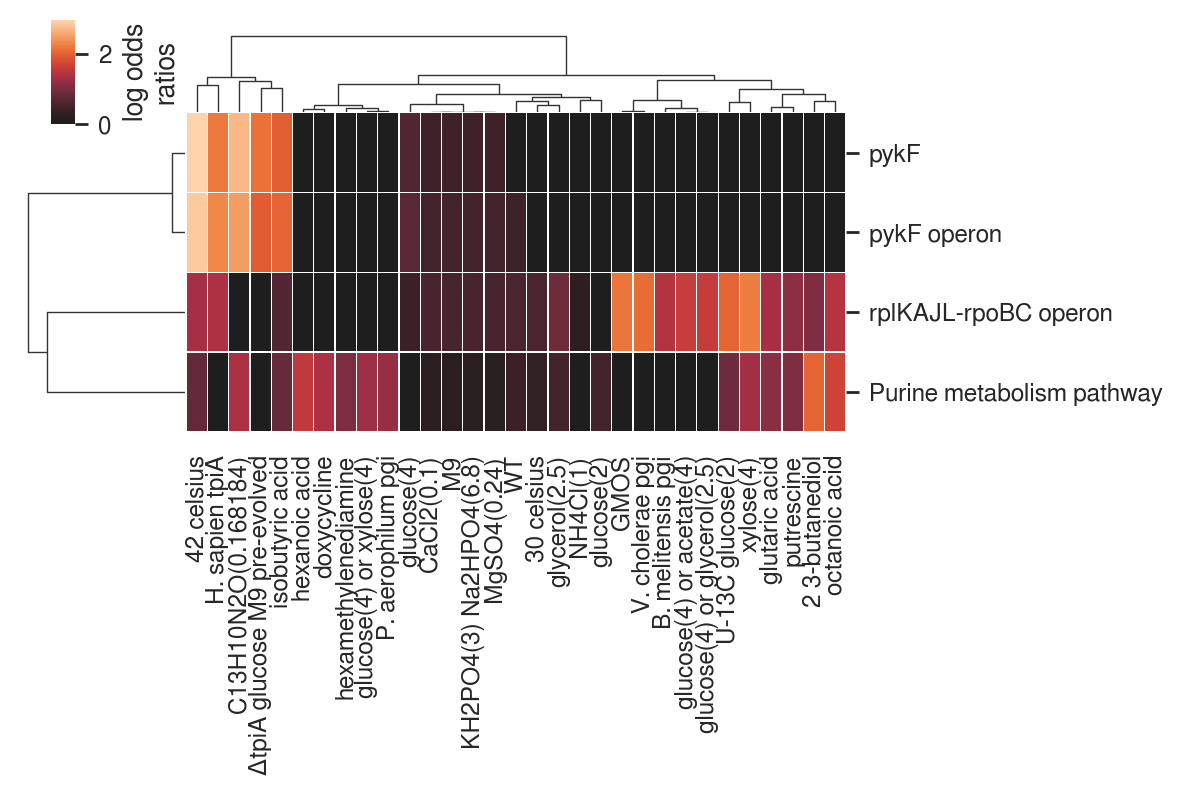

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("white")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = design_assoc_mat.copy()

cm = sns.clustermap(
    df,
    linewidths=0.1,
    figsize=(6, 4),
    center=0,
    yticklabels=True,
    xticklabels=True,
    cbar_kws={'label': 'log odds\nratios'},
    cbar_pos=(0.05, 0.85, .02, .13),
)
# Fix for recent matplotlib/seaborn issue
cm.ax_heatmap.set_ylim(len(df)+0, -0)